##  Logistic Regression

using ex2data2.txt

### 1.1 Visualizing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
data=pd.read_csv("ex2data1.txt",names=["exam1 score","exam2 score","labels"])
data

,exam1 score,exam2 score,labels
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


Text(0, 0.5, 'Exam2 score')

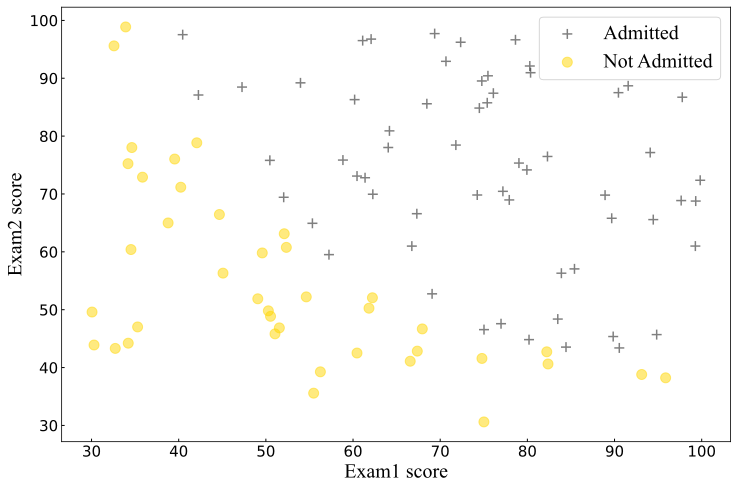

In [3]:
fig,ax=plt.subplots(figsize=(12,8))

#legend
font= {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 20,
         }
ax.tick_params(labelsize=15,direction="in",width=1,length=3,color="black")

y=data.iloc[:,-1:].values
positive=data[data["labels"].isin([1])]
negative=data[data["labels"].isin([0])]

ax.scatter(positive["exam1 score"],positive["exam2 score"],c="black",alpha=.5,marker="+",s=100,label="Admitted")
ax.scatter(negative["exam1 score"],negative["exam2 score"],c="#FFD700",alpha=.5,marker="o",s=100,label="Not Admitted")

ax.legend(prop=font)
ax.set_xlabel("Exam1 score",font)
ax.set_ylabel("Exam2 score",font)

### 1.2 Implementation

#### 1.2.1 sigmoid function

Recall that the logistic regression hypothsis is defined as:

$h_{\theta}=g(\theta^{T}x)$

The sigmoid function is defined as:

$g(z)=\frac{1}{1+e^{-z}}$

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

#### 1.2.2 Cost funtion and gradient

Recall that the cost function is defined as:

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{i})log(1-h_{\theta}(x^{(i)}))]$

And the gradient of the cost if defined as:

$\frac{\partial J(\theta)}{\partial \theta_{j}}=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{i})-y^{(i)})x_{j}^{(i)}$

In [5]:
def compute_cost(theta,X,y):
    """
    :param theta: mat
    :param X: mat
    :param y: mat
    """ 
    theta = np.mat(theta)
    X = np.mat(X)
    y = np.mat(y)
    m=X.shape[0]
    term1=np.multiply(y,np.log(sigmoid(X*theta.T)))
    term2=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    
    return (1/m)*np.sum(-term1-term2)

In [6]:
# insert the intercept term
data.insert(0,"interceopt term",1)

In [7]:
#X,y,theta:matrix

X=np.mat(data.iloc[:,:3].values)
print("X.head(2):\n{}".format(X[:2,:]))
y=np.mat(data.iloc[:,-1:].values)
print("y.head(2):\n{}".format(y[:2,:]))

# initialize the theta
theta=np.mat(np.zeros(X.shape[1]))
print(theta.shape)

# initialize the learning rate
alpha=0.01

print("The cost of initial {}".format(compute_cost(theta,X,y)))

X.head(2):
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]]
y.head(2):
[[0]
 [0]]
(1, 3)
The cost of initial 0.6931471805599453


In [8]:
# #X,y,theta:ndarray

# X=np.array(data.iloc[:,:3].values)
# print("X.head(2):\n{}".format(X[:2,:]))
# y=np.array(data.iloc[:,-1:].values)
# print("y.head(2):\n{}".format(y[:2,:]))

# # initialize the theta
# theta=np.zeros(X.shape[1])
# print(theta.shape)

# # initialize the learning rate
# alpha=0.01

# print("The cost of initial {}".format(compute_cost(theta,X,y)))

In [9]:
def compute_gradient(theta,X,y):
    """
    :param theta: mat
    :param X: mat
    :param y: mat
    """
    
    theta=np.mat(theta)
    X=np.mat(X)
    y=np.mat(y)
    parameters=int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    m=X.shape[0]
    
    error=sigmoid(X*theta.T)-y
    
    for j in range(parameters):
        term=np.multiply(error,X[:,j])
        
        grad[j]=(1/m)*np.sum(term)
        
    return grad

#### 1.2.3 Learning parameters using fminunc

The initial values of thr parameters we are trying to optimize

A function that,when giving the training set and a particular $\theta$,computes the cost and gradient with respect to $\theta$ for the dataset$(X,y)$

In [10]:
import scipy.optimize as opt

In [11]:
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=compute_gradient, args=(X, y))
result

(array([-25.16131858,   0.20623159,   0.20147149]), 36, 0)

In [12]:
res=opt.minimize(fun=compute_cost,x0=theta,jac=compute_gradient,args=(X,y),method='Newton-CG')
res

     fun: 0.2034977046584158
     jac: array([-1.40727436e-05, -9.88287471e-04, -9.29152882e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 27
    njev: 228
  status: 0
 success: True
       x: array([-25.15679341,   0.2061951 ,   0.20143518])

In [13]:
compute_cost(res.x,X,y)

0.2034977046584158

#### 1.2.4 Evaluating logistic regression

In [14]:
coef=res.x

x_cor=np.arange(30,120,step=1)
y_cor=-(coef[0]+coef[1]*x_cor)/coef[2]

(30.0, 100.0)

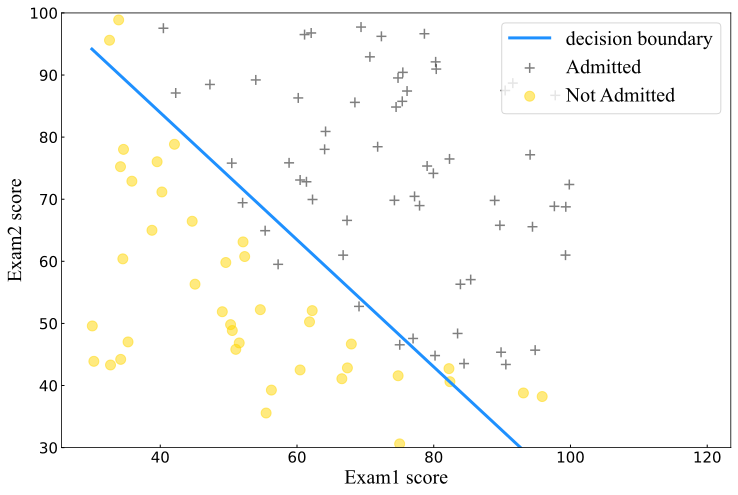

In [15]:
fig,ax=plt.subplots(figsize=(12,8))

#param
font= {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 20,
         }
ax.tick_params(labelsize=15,direction="in",width=1,length=3,color="black")

y=data.iloc[:,-1:].values
positive=data[data["labels"].isin([1])]
negative=data[data["labels"].isin([0])]

ax.scatter(positive["exam1 score"],positive["exam2 score"],c="black",alpha=.5,marker="+",s=100,label="Admitted")
ax.scatter(negative["exam1 score"],negative["exam2 score"],c="#FFD700",alpha=.5,marker="o",s=100,label="Not Admitted")
ax.plot(x_cor,y_cor,linewidth=3,c="#1E90FF",label="decision boundary")

ax.legend(prop=font)
ax.set_xlabel("Exam1 score",font)
ax.set_ylabel("Exam2 score",font)
ax.set_ylim(30,100)

## 2 Regularized logistic regression

using ex2data2.txt

### 2.1 Visualizing the data

In [16]:
data=pd.read_csv("ex2data2.txt",names=["Microchip test 1","Microchip test 2","labels"])
data.head()

,Microchip test 1,Microchip test 2,labels
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0, 0.5, 'Microchip test 2')

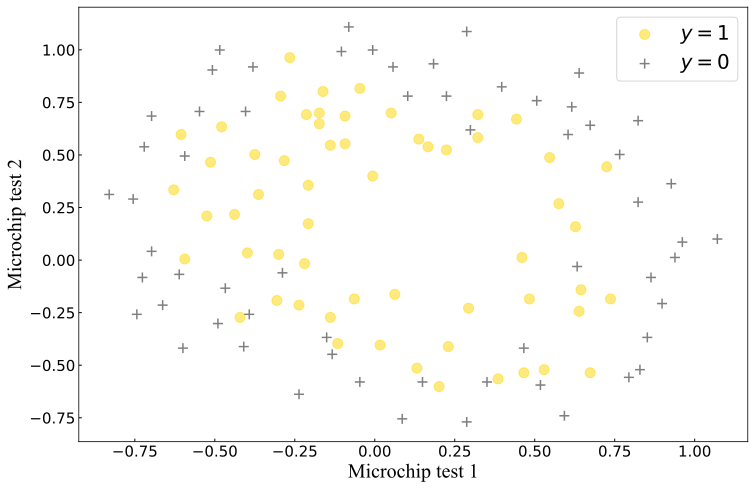

In [17]:
fig,ax=plt.subplots(figsize=(12,8))

font={
    "family":"Times New Roman",
    "weight":"normal",
    "size":20
}

ax.tick_params(labelsize=15,direction="in",color="black",width=1,length=3)

positive=data[data["labels"].isin([1])]
negative=data[data["labels"].isin([0])]

ax.scatter(positive["Microchip test 1"],positive["Microchip test 2"],s=100,c="#FFD700",alpha=.5,label="$y=1$")
ax.scatter(negative["Microchip test 1"],negative["Microchip test 2"],s=100,c="black",marker="+",alpha=.5,label="$y=0$")

ax.legend(prop=font)
ax.set_xlabel("Microchip test 1",font)
ax.set_ylabel("Microchip test 2",font)



###  2.2 Feature mapping

$mapFeature(x)=[1,x_{1},x_{2},x_{1}^{2},x_{1}x_{2}...x_{1}x_{5}^{2},x_{2}^{6}]$

As a result of this mapping,our vector of two features has been transformed into 28-dimension vector

In [18]:
import copy

def feature_mapping(degree,data):
    data_feature_mapping=copy.deepcopy(data)
    x1=data["Microchip test 1"]
    x2=data["Microchip test 2"]
    for i in range(1,degree+1):
        for j in range(i+1):
            data_feature_mapping["F"+str(i-j)+str(j)]=np.power(x1,i-j)*np.power(x2,j)
            
    data_feature_mapping.drop("Microchip test 1",axis=1,inplace=True)
    data_feature_mapping.drop("Microchip test 2",axis=1,inplace=True)
    # insert intercept term
    data_feature_mapping.insert(1,"Ones",1)
    
    return data_feature_mapping

data_feature_mapping=feature_mapping(6,data)

In [19]:
print(data_feature_mapping.shape)
data_feature_mapping.head()

(118, 29)


,labels,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


### 2.3 Cost function and gradient

Recall that the regularized cost funtion in logistic regression is defined as (Note that you should not regularized the $\theta_{0}$):

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{i})log(1-h_{\theta}(x^{(i)}))]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$


The gradient of cost function is defined as:


$\frac{\partial J(\theta)}{\partial \theta_{j}}=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{i})-y^{(i)})x_{j}^{(i)}$ for j=0

$\frac{\partial J(\theta)}{\partial \theta_{j}}=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{i})-y^{(i)})x_{j}^{(i)}+\frac{\lambda}{m}\theta_{j}$  for j$\geq1$

In [20]:
# inintialize 

X=np.array(data_feature_mapping.iloc[:,1:].values)
y=np.array(data_feature_mapping.iloc[:,:1].values)
print("shape of X:\n{}".format(X.shape))
print("shape of y:\n{}".format(y.shape))

theta=np.zeros(X.shape[1])
print("shape of theta\n{}".format(theta.shape))
C=1

shape of X:
(118, 28)
shape of y:
(118, 1)
shape of theta
(28,)


In [21]:
def compute_cost_re(theta,X,y,C):
    theta=np.mat(theta)
    X=np.mat(X)
    y=np.mat(y)
    
    m=X.shape[0]
    n=theta.shape[1]
    
    term1=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    term2=np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))
    reg=(C/(2*m)*np.sum(np.power(theta[:,1:n],2))) #j:=[1,n]
    
    return  (1/m)*np.sum(term1-term2)+reg
compute_cost_re(theta,X,y,C)

0.6931471805599454

In [22]:
def compute_gradientdescent_re(theta,X,y,C):
    theta=np.mat(theta)
    X=np.mat(X)
    y=np.mat(y)
    
    m=X.shape[0]
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    
    error=sigmoid(X*theta.T)-y
    
    for j in range(parameters):
        term=np.multiply(error,X[:,j])

        
        if (j==0):
            grad[j]=np.sum(term)/m
        else:
            grad[j]=np.sum(term)/m+(C/m)*theta[:,j]
            
    return grad

compute_gradientdescent_re(theta,X,y,C)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

#### 2.3.1 Learning parameters using fminunc

In [23]:
import scipy.optimize as opt
res_min = opt.minimize(fun=compute_cost_re, x0=theta, args=(X,y,C), method='Newton-CG', jac=compute_gradientdescent_re)
res_min

     fun: 0.5290027297129146
     jac: array([-2.80409521e-07, -1.00810305e-07,  1.22937934e-07, -5.08268321e-08,
        1.24833400e-08, -9.39929480e-08, -2.44867320e-08,  3.33434359e-08,
       -9.77344700e-09,  6.88883969e-09, -6.04784449e-08, -3.53517733e-09,
       -5.19875336e-08,  7.67595576e-09, -5.61702088e-08, -1.71396767e-08,
        2.15246160e-08, -2.15459998e-08, -2.59513409e-09,  1.11453733e-09,
       -1.53975085e-08, -3.89245635e-08,  2.44266054e-09, -2.16370326e-08,
       -6.41524191e-09, -1.63738534e-08,  4.19558940e-09, -4.04802192e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 66
  status: 0
 success: True
       x: array([ 1.27273987,  0.62527137,  1.18108972, -2.01995879, -0.91742447,
       -1.43166502,  0.12400838, -0.3655335 , -0.35723814, -0.17513152,
       -1.45815885, -0.05099015, -0.61555865, -0.27470643, -1.19281744,
       -0.24218729, -0.20600496, -0.04473194, -0.27778524, -0.29537722,
       -0.4

In [24]:
import scipy.optimize as opt
res_tnc=opt.fmin_tnc(func=compute_cost_re,x0=theta,fprime=compute_gradientdescent_re,args=(X,y,C))
res_tnc

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
        -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516291,
        -1.45817009, -0.05098418, -0.61558554, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603298, -0.04466178, -0.27778951, -0.29539514,
        -0.45645982, -1.04319155,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742405, -0.1438915 , -0.92467487]),
 32,
 1)

### 2.4 Plotting the decision boundary

In [25]:
from scipy.interpolate import make_interp_spline

def feature_mapping_plot(theta,x1,x2):
    degree=6
    tmp=theta[0][0]
    place=0
    for i in range(1,degree+1):
        for j in range(0,i+1):
            tmp+=np.power(x1,i-j)*np.power(x2,j)*theta[0][place+1]
            place+=1
    return tmp
def find_decision_boundary(theta):
    t1=np.linspace(-1,1.5,3000)
    t2=np.linspace(-1,1.5,3000)
    
    cordinates=[(x,y) for x in t1 for y in t2]
    x_cord,y_cord=zip(*cordinates)
    
    h_val=pd.DataFrame({"x1":x_cord,"x2":y_cord})
    h_val["hval"]=feature_mapping_plot(theta,h_val["x1"],h_val["x2"])
    
    decision=h_val[np.abs(h_val["hval"])<2*10**-3]
    
    return decision.x1,decision.x2
x_array=np.array([2.94,3.53,4.04,4.48873,4.89895,5.3761,5.5])
y_array=np.array([0.,0.69,1.7138,3.30976,4.97306,6.50168,7])
x_smooth=np.linspace(x_array.min(),x_array.max())
y_smooth=make_interp_spline(x_array,y_array)(x_smooth)

x1,x2=find_decision_boundary(res_tnc)

Text(0, 0.5, 'Microchip test 2')

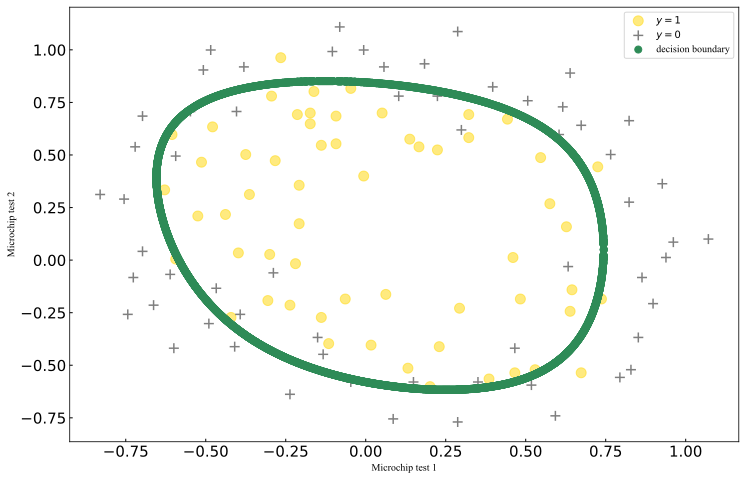

In [26]:
fig,ax=plt.subplots(figsize=(12,8))

font={
    "family":"Times New Roman",
    "weight":"normal",
    "size":10
}

ax.tick_params(labelsize=15,direction="in",color="black",width=1,length=3)

positive=data[data["labels"].isin([1])]
negative=data[data["labels"].isin([0])]

ax.scatter(positive["Microchip test 1"],positive["Microchip test 2"],s=100,c="#FFD700",alpha=.5,label="$y=1$")
ax.scatter(negative["Microchip test 1"],negative["Microchip test 2"],s=100,c="black",marker="+",alpha=.5,label="$y=0$")
ax.scatter(x1,x2,s=50,c="#2E8B57",label="decision boundary")

ax.legend(prop=font)
ax.set_xlabel("Microchip test 1",font)
ax.set_ylabel("Microchip test 2",font)
